## Toyproject - 데이터 분석

#### 김민경

### 주유소 분석

1. 부산 지역에서는 해운대구의 기름이 가장 비쌀 것이다.(해운대구가 전체적으로 물가가 비싼 이미지)<br>
▶부산 지역에서 어떤 구가 제일 가격이 저렴한지<br><br>
2. 알뜰주유소의 기름가격이 다른 상표에 비해서 많이 저렴할 것이다.<br>
▶어떤 브랜드가 가장 저렴한지<br><br>
3. 셀프 주유소를 사용하는 것이 비셀프 주유소를 이용하는 것보다 훨씬 저렴할 것이다.<br>
▶셀프 주유소와 비셀프 주유소 간의 평균 가격 차이가 얼마나 나는지

### 데이터 전처리

파일 불러오기 & 헤더 부분이 없어져서 헤더 불러오기

In [74]:
import pandas as pd
test = pd.read_excel('지역_위치별(주유소).xls', header=2)

test.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,부산광역시,부산축산농협주유소,부산 강서구 낙동남로 448 (녹산동),NH-OIL,051-973-8141,N,-,1549,1349,1100
1,부산광역시,공항대로주유소,부산 강서구 공항로 1217 (대저1동),알뜰주유소,051-973-8122,Y,-,1558,1368,1000
2,부산광역시,우리들주유소,부산 강서구 낙동남로 667 (녹산동),알뜰주유소,051-941-5145,Y,-,1559,1359,-
3,부산광역시,(주)시큐 국제산단주유소,부산 강서구 생곡로 272,GS칼텍스,051-714-2208,Y,-,1559,1359,1050
4,부산광역시,김해공항주유소,부산 강서구 공항진입로 25 (대저2동),GS칼텍스,051-973-8291,Y,-,1568,1389,1120


컬럼 내용 확인

In [2]:
test.columns

Index(['지역', '상호', '주소', '상표', '전화번호', '셀프여부', '고급휘발유', '휘발유', '경유', '실내등유'], dtype='object')

데이터 타입 확인

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      394 non-null    object
 1   상호      394 non-null    object
 2   주소      394 non-null    object
 3   상표      394 non-null    object
 4   전화번호    394 non-null    object
 5   셀프여부    394 non-null    object
 6   고급휘발유   394 non-null    object
 7   휘발유     394 non-null    object
 8   경유      394 non-null    object
 9   실내등유    394 non-null    object
dtypes: object(10)
memory usage: 30.9+ KB


필요한 데이터만 data라는 이름의 데이터프레임으로 만든다.

In [4]:
data = pd.DataFrame({
    '상호':test['상호'],
    '주소':test['주소'],
    '상표':test['상표'],
    '셀프여부':test['셀프여부'],
    '휘발유':test['휘발유'],
    '경유':test['경유'],
})

In [5]:
data

,상호,주소,상표,셀프여부,휘발유,경유
0,부산축산농협주유소,부산 강서구 낙동남로 448 (녹산동),NH-OIL,N,1549,1349
1,공항대로주유소,부산 강서구 공항로 1217 (대저1동),알뜰주유소,Y,1558,1368
2,우리들주유소,부산 강서구 낙동남로 667 (녹산동),알뜰주유소,Y,1559,1359
3,(주)시큐 국제산단주유소,부산 강서구 생곡로 272,GS칼텍스,Y,1559,1359
4,김해공항주유소,부산 강서구 공항진입로 25 (대저2동),GS칼텍스,Y,1568,1389
...,...,...,...,...,...,...
389,SK에너지(주)신도시주유소,부산 해운대구 대천로 82 (좌동),SK에너지,Y,1649,1459
390,SK에너지(주) 돌고래주유소,부산 해운대구 해운대로573번길 16,SK에너지,N,1659,1459
391,지에스칼텍스(주)해운대중동주유소,부산 해운대구 좌동로 34 (중동),GS칼텍스,Y,1659,1469
392,에스씨(주) 마리나타운주유소,부산 해운대구 해운대해변로 44 (우동),GS칼텍스,N,1698,1528


주소에서 '구' 부분만 분리하기

In [6]:
data['구'] = [add.split()[1] for add in data['주소']]
data.head()

,상호,주소,상표,셀프여부,휘발유,경유,구
0,부산축산농협주유소,부산 강서구 낙동남로 448 (녹산동),NH-OIL,N,1549,1349,강서구
1,공항대로주유소,부산 강서구 공항로 1217 (대저1동),알뜰주유소,Y,1558,1368,강서구
2,우리들주유소,부산 강서구 낙동남로 667 (녹산동),알뜰주유소,Y,1559,1359,강서구
3,(주)시큐 국제산단주유소,부산 강서구 생곡로 272,GS칼텍스,Y,1559,1359,강서구
4,김해공항주유소,부산 강서구 공항진입로 25 (대저2동),GS칼텍스,Y,1568,1389,강서구


혹시 이상한 부분이 분리되지는 않았는지 체크하기(ex. 부산 광역시 = '광역시' 부분이 나오는 경우)

In [7]:
data['구'].unique()

array(['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구',
       '서구', '수영구', '연제구', '영도구', '중구', '해운대구'], dtype=object)

휘발유와 경유를 숫자형으로 형변환

In [8]:
data['휘발유'] = data['휘발유'].astype(float)

ValueError: could not convert string to float: '-'

값이 - 라고 표기된 경우가 있다는 것을 알 수 있다

In [10]:
data[data['휘발유'] == '-']

,상호,주소,상표,셀프여부,휘발유,경유,구
50,은마석유(주)직영 강서주유소,부산 강서구 공항로 483 (대저2동),현대오일뱅크,Y,-,-,강서구
150,성지주유소,부산 남구 유엔로 42 (우암동),SK에너지,N,-,-,남구
180,광신석유(주)직영 교대주유소,부산 동래구 여고로 131 (사직동),SK에너지,N,-,-,동래구
204,당감주유소,부산 부산진구 동평로 49 (당감동),SK에너지,N,-,-,부산진구
268,광신석유(주)직영 가야대로주유소,부산 사상구 가야대로 395,SK에너지,Y,-,-,사상구
269,광신석유(주)직영 학장주유소,부산 사상구 학장로 273 (학장동),SK에너지,Y,-,-,사상구
270,서부산IC주유소,부산 사상구 학감대로 170,SK에너지,Y,-,-,사상구
344,연산주유소,부산 연제구 월드컵대로 60 (연산동),현대오일뱅크,Y,-,-,연제구
393,백천주유소,부산광역시 해운대구 반송로 910 (반송제2동),GS칼텍스,N,-,-,해운대구


In [11]:
data[data['경유'] == '-']

,상호,주소,상표,셀프여부,휘발유,경유,구
50,은마석유(주)직영 강서주유소,부산 강서구 공항로 483 (대저2동),현대오일뱅크,Y,-,-,강서구
150,성지주유소,부산 남구 유엔로 42 (우암동),SK에너지,N,-,-,남구
180,광신석유(주)직영 교대주유소,부산 동래구 여고로 131 (사직동),SK에너지,N,-,-,동래구
204,당감주유소,부산 부산진구 동평로 49 (당감동),SK에너지,N,-,-,부산진구
268,광신석유(주)직영 가야대로주유소,부산 사상구 가야대로 395,SK에너지,Y,-,-,사상구
269,광신석유(주)직영 학장주유소,부산 사상구 학장로 273 (학장동),SK에너지,Y,-,-,사상구
270,서부산IC주유소,부산 사상구 학감대로 170,SK에너지,Y,-,-,사상구
344,연산주유소,부산 연제구 월드컵대로 60 (연산동),현대오일뱅크,Y,-,-,연제구
393,백천주유소,부산광역시 해운대구 반송로 910 (반송제2동),GS칼텍스,N,-,-,해운대구


휘발유 가격이 - 인 행

In [12]:
error = data[data['휘발유'] == '-'].index
print(error)

Int64Index([50, 150, 180, 204, 268, 269, 270, 344, 393], dtype='int64')


휘발유 가격이 -인 행 제거해서 새로운 데이터프레임으로 저장

In [16]:
data1 = data.drop(error)
data1

,상호,주소,상표,셀프여부,휘발유,경유,구
0,부산축산농협주유소,부산 강서구 낙동남로 448 (녹산동),NH-OIL,N,1549,1349,강서구
1,공항대로주유소,부산 강서구 공항로 1217 (대저1동),알뜰주유소,Y,1558,1368,강서구
2,우리들주유소,부산 강서구 낙동남로 667 (녹산동),알뜰주유소,Y,1559,1359,강서구
3,(주)시큐 국제산단주유소,부산 강서구 생곡로 272,GS칼텍스,Y,1559,1359,강서구
4,김해공항주유소,부산 강서구 공항진입로 25 (대저2동),GS칼텍스,Y,1568,1389,강서구
...,...,...,...,...,...,...,...
388,SK에너지(주) 마리나주유소,부산 해운대구 해운대로 345 (우동),SK에너지,Y,1639,1449,해운대구
389,SK에너지(주)신도시주유소,부산 해운대구 대천로 82 (좌동),SK에너지,Y,1649,1459,해운대구
390,SK에너지(주) 돌고래주유소,부산 해운대구 해운대로573번길 16,SK에너지,N,1659,1459,해운대구
391,지에스칼텍스(주)해운대중동주유소,부산 해운대구 좌동로 34 (중동),GS칼텍스,Y,1659,1469,해운대구


경유 가격이 -인 행

In [17]:
error2 = data1[data1['경유'] == '-'].index
print(error2)

Int64Index([], dtype='int64')


휘발유 가격이 -인 행을 제거하니 경유 가격이 -인 행은 없다는 것을 확인할 수 있다. (둘 다 동일한 곳에서 가격이 없었다는 뜻)

다시 휘발유와 경유를 숫자형으로 변환

In [29]:
data1['휘발유'] = data1['휘발유'].astype(float)
data1['경유'] = data1['경유'].astype(float)

In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 392
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      385 non-null    object 
 1   주소      385 non-null    object 
 2   상표      385 non-null    object 
 3   셀프여부    385 non-null    object 
 4   휘발유     385 non-null    float64
 5   경유      385 non-null    float64
 6   구       385 non-null    object 
dtypes: float64(2), object(5)
memory usage: 24.1+ KB


데이터 전처리 끝

### 질문

### 1. 부산 지역에서는 해운대구의 기름이 가장 비쌀 것이다.(해운대구가 전체적으로 물가가 비싼 이미지)<br>
▶부산 지역에서 어떤 구가 제일 가격이 저렴한지

* 구 별로 휘발유 평균 구하기

In [82]:
data_gas = data1.groupby('구')['휘발유'].agg(**{'휘발유평균':'mean'}).reset_index()
data_gas

,구,휘발유평균
0,강서구,1597.860000
1,금정구,1599.045455
2,기장군,1570.043478
3,남구,1593.193548
4,동구,1616.000000
5,동래구,1580.052632
6,부산진구,1590.521739
7,북구,1571.000000
8,사상구,1591.911111
9,사하구,1594.593750


오름차순으로 나열해서 가장 비싼 구부터 싼 구 순으로 표시

In [106]:
data_gas = data_gas.sort_values(by='휘발유평균', ascending=False)
data_gas

,구,휘발유평균
13,영도구,1665.000000
14,중구,1621.500000
4,동구,1616.000000
11,수영구,1607.375000
1,금정구,1599.045455
0,강서구,1597.860000
15,해운대구,1597.250000
9,사하구,1594.593750
3,남구,1593.193548
8,사상구,1591.911111


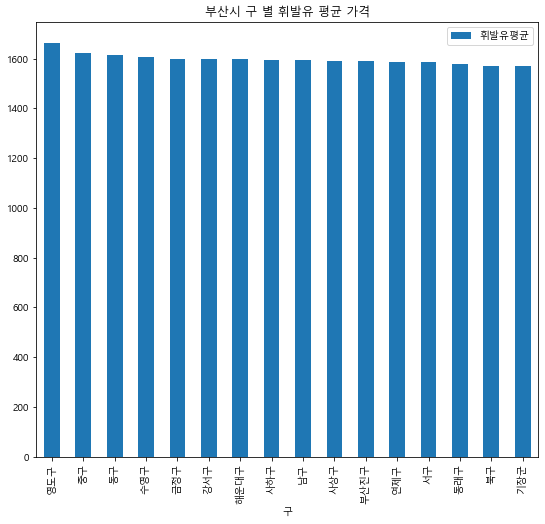

In [146]:
import matplotlib.pyplot as plt
data_gas.plot(x='구', y='휘발유평균', kind="bar",figsize=(9,8)) #x축, y축
plt.title('부산시 구 별 휘발유 평균 가격')
plt.show()

#### 가장 비싼 곳은 영도구, 가장 싼 곳은 기장군. 해운대구는 중간 정도였다.

* 구 별로 경유 평균 구하기

In [108]:
data_diesel = data1.groupby('구')['경유'].agg(**{'경유평균':'mean'}).reset_index()
data_diesel

,구,경유평균
0,강서구,1404.700000
1,금정구,1435.636364
2,기장군,1402.369565
3,남구,1427.096774
4,동구,1412.400000
5,동래구,1412.736842
6,부산진구,1410.956522
7,북구,1397.111111
8,사상구,1418.066667
9,사하구,1404.593750


오름차순으로 나열해서 가장 비싼 구부터 싼 구 순으로 표시

In [110]:
data_diesel = data_diesel.sort_values(by='경유평균', ascending=False)
data_diesel

,구,경유평균
13,영도구,1510.000000
11,수영구,1442.375000
14,중구,1441.500000
1,금정구,1435.636364
3,남구,1427.096774
15,해운대구,1425.833333
8,사상구,1418.066667
12,연제구,1413.333333
5,동래구,1412.736842
4,동구,1412.400000


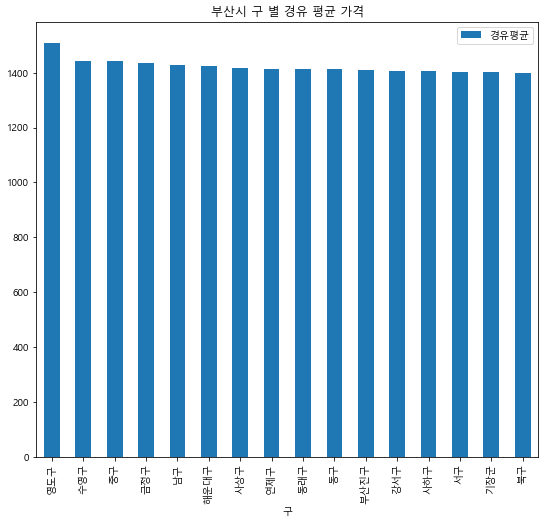

In [123]:
import matplotlib.pyplot as plt
data_diesel.plot(x='구', y='경유평균', kind="bar",figsize=(9,8)) #x축, y축
plt.title('부산시 구 별 경유 평균 가격')
plt.show()

#### 가장 비싼 곳은 영도구, 가장 싼 곳은 북구. 이번에도 해운대구는 중간 정도였다.

### 2. 알뜰주유소의 기름가격이 다른 상표에 비해서 많이 저렴할 것이다.<br>
▶어떤 브랜드가 가장 저렴한지

* 휘발유

In [113]:
data_cheap = data1.groupby('상표')['휘발유'].agg(**{'휘발유평균':'mean'}).reset_index()
data_cheap

,상표,휘발유평균
0,GS칼텍스,1585.500000
1,NH-OIL,1549.333333
2,S-OIL,1598.706667
3,SK에너지,1609.324324
4,알뜰주유소,1545.678571
5,자가상표,1581.250000
6,현대오일뱅크,1590.153846


내림차순으로 나열하여 가장 싼 브랜드부터 나열

In [114]:
data_cheap = data_cheap.sort_values(by='휘발유평균', ascending=True)
data_cheap

,상표,휘발유평균
4,알뜰주유소,1545.678571
1,NH-OIL,1549.333333
5,자가상표,1581.250000
0,GS칼텍스,1585.500000
6,현대오일뱅크,1590.153846
2,S-OIL,1598.706667
3,SK에너지,1609.324324


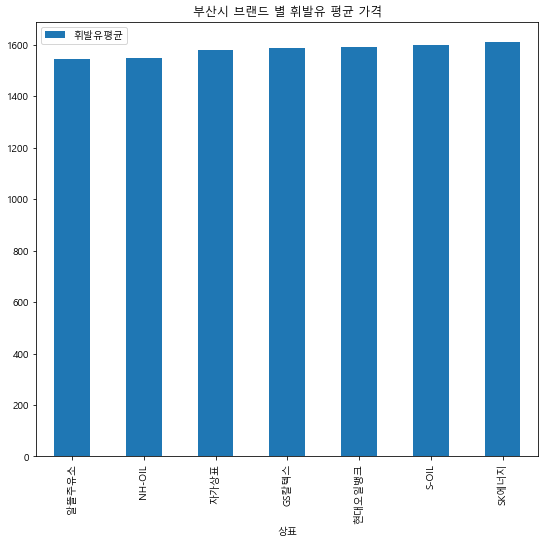

In [124]:
import matplotlib.pyplot as plt
data_cheap.plot(x='상표', y='휘발유평균', kind="bar",figsize=(9,8)) #x축, y축
plt.title('부산시 브랜드 별 휘발유 평균 가격')
plt.show()

#### 알뜰주유소의 휘발유 가격이 다른 브랜드보다 저렴하다.

* 경유

In [118]:
data_cheap2 = data1.groupby('상표')['경유'].agg(**{'경유평균':'mean'}).reset_index()
data_cheap2

,상표,경유평균
0,GS칼텍스,1413.825581
1,NH-OIL,1367.666667
2,S-OIL,1419.053333
3,SK에너지,1431.828829
4,알뜰주유소,1373.500000
5,자가상표,1405.750000
6,현대오일뱅크,1415.153846


내림차순으로 나열하여 가장 싼 브랜드부터 나열

In [119]:
data_cheap2 = data_cheap2.sort_values(by='경유평균', ascending=True)
data_cheap2

,상표,경유평균
1,NH-OIL,1367.666667
4,알뜰주유소,1373.500000
5,자가상표,1405.750000
0,GS칼텍스,1413.825581
6,현대오일뱅크,1415.153846
2,S-OIL,1419.053333
3,SK에너지,1431.828829


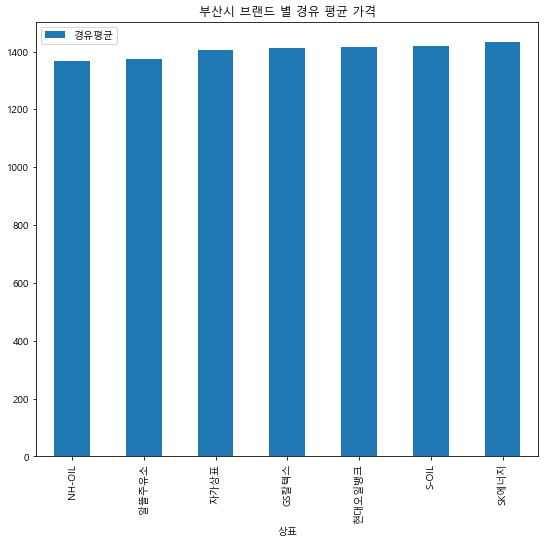

In [125]:
import matplotlib.pyplot as plt
data_cheap2.plot(x='상표', y='경유평균', kind="bar",figsize=(9,8)) #x축, y축
plt.title('부산시 브랜드 별 경유 평균 가격')
plt.show()

#### 놀랍게도 NH-OIL의 경유가 알뜰주유소의 경유보다 저렴하다

### 3. 셀프 주유소를 사용하는 것이 비셀프 주유소를 이용하는 것보다 훨씬 저렴할 것이다.
* 셀프 주유소와 비셀프 주유소 간의 평균 가격 차이가 얼마나 나는지

* 휘발유

In [46]:
condition = (data1['셀프여부'] == 'Y')
self_Y_mean = data1.loc[condition, '휘발유'].mean()
self_Y_mean

1580.3947368421052

In [47]:
condition = (data1['셀프여부'] == 'N')
self_N_mean = data1.loc[condition, '휘발유'].mean()
self_N_mean

1620.0840336134454

In [49]:
self_data = {'self': ['self_Y', 'self_N'],
        'price': [self_Y_mean, self_N_mean],
          }
self_df = pd.DataFrame(self_data)
self_df

,self,price
0,self_Y,1580.394737
1,self_N,1620.084034


셀프 주유소에서 휘발유를 넣을 때 : 1580.395 원
비셀프 주유소에서 휘발유를 넣을 때 : 1620.084 원


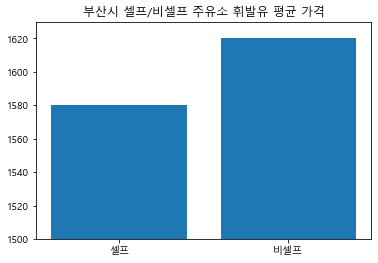

In [127]:
print('셀프 주유소에서 휘발유를 넣을 때 :', round(self_Y_mean, 3), '원')
print('비셀프 주유소에서 휘발유를 넣을 때 :', round(self_N_mean, 3), '원')

import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.title('부산시 셀프/비셀프 주유소 휘발유 평균 가격')
plt.bar(["셀프", "비셀프"], height = [self_Y_mean, self_N_mean]) #속성 height(높이)
plt.ylim([1500, 1630])     # Y축의 범위: [ymin, ymax]
plt.show()

50L를 넣는다고 가정한다면...

셀프 주유소에서 50L를 넣을 때 : 79019.737 원
비셀프 주유소에서 50L를 넣을 때 : 81004.202 원
1984.465 원 차이


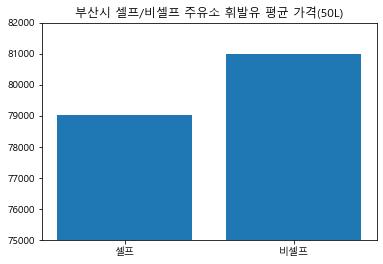

In [151]:
#50리터를 넣는다면

print('셀프 주유소에서 50L를 넣을 때 :', round(self_Y_mean * 50, 3), '원')
print('비셀프 주유소에서 50L를 넣을 때 :', round(self_N_mean * 50, 3), '원')
print(round(self_N_mean * 50 -self_Y_mean * 50, 3), '원 차이')

import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.title('부산시 셀프/비셀프 주유소 휘발유 평균 가격(50L)')
plt.bar(["셀프", "비셀프"], height = [self_Y_mean * 50, self_N_mean * 50]) #속성 height(높이)
plt.ylim([75000, 82000])     # Y축의 범위: [ymin, ymax]
plt.show()

* 경유

In [130]:
condition = (data1['셀프여부'] == 'Y')
self_Y_mean2 = data1.loc[condition, '경유'].mean()
self_Y_mean2

1406.1315789473683

In [131]:
condition = (data1['셀프여부'] == 'N')
self_N_mean2 = data1.loc[condition, '경유'].mean()
self_N_mean2

1441.0588235294117

In [134]:
self_data2 = {'self': ['self_Y', 'self_N'],
        'price': [self_Y_mean2, self_N_mean2],
          }
self_df2 = pd.DataFrame(self_data2)
self_df2

,self,price
0,self_Y,1406.131579
1,self_N,1441.058824


셀프 주유소에서 경유를 넣을 때 : 1406.132 원
비셀프 주유소에서 경유를 넣을 때 : 1441.059 원


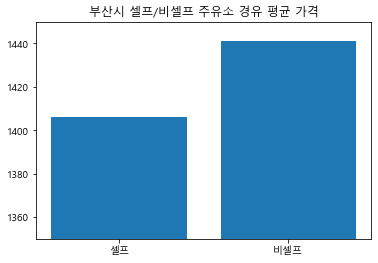

In [138]:
print('셀프 주유소에서 경유를 넣을 때 :', round(self_Y_mean2, 3), '원')
print('비셀프 주유소에서 경유를 넣을 때 :', round(self_N_mean2, 3), '원')

import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.title('부산시 셀프/비셀프 주유소 경유 평균 가격')
plt.bar(["셀프", "비셀프"], height = [self_Y_mean2, self_N_mean2]) #속성 height(높이)
plt.ylim([1350, 1450])     # Y축의 범위: [ymin, ymax]
plt.show()

셀프 주유소에서 경유를 넣을 때 : 70306.579 원
비셀프 주유소에서 경유를 넣을 때 : 72052.941 원
1746.362 원 차이


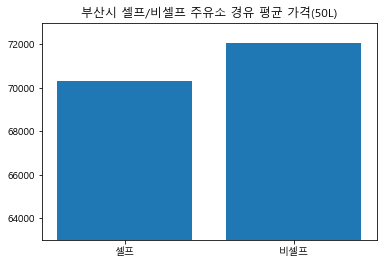

In [150]:
print('셀프 주유소에서 경유를 넣을 때 :', round(self_Y_mean2 * 50, 3), '원')
print('비셀프 주유소에서 경유를 넣을 때 :', round(self_N_mean2 * 50, 3), '원')
print(round(self_N_mean2 * 50 -self_Y_mean2 * 50, 3), '원 차이')

import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.title('부산시 셀프/비셀프 주유소 경유 평균 가격(50L)')
plt.bar(["셀프", "비셀프"], height = [self_Y_mean2 * 50, self_N_mean2 * 50]) #속성 height(높이)
plt.ylim([63000, 73000])     # Y축의 범위: [ymin, ymax]
plt.show()